Import library yang dibutuhkan

In [40]:
import pandas as pd
import numpy as np

Read dataset & melihat detail dataset

In [41]:
df = pd.read_csv('hasil_clustering.csv')
# Menambahkan 1 pada nilai cluster agar tidak ada cluster bernilai 0
df['Spectral_Cluster'] = df['Spectral_Cluster'] + 1
df.head()

,date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,station_id,Spectral_Cluster
0,2018-01-01,24.0,34.0,28.1,80.0,21.300000,8.0,6.0,240.0,3.5,8.0,96733.0,4
1,2018-01-02,24.0,34.0,29.7,75.0,10.344604,6.9,5.0,250.0,3.5,8.0,96733.0,4
2,2018-01-03,26.0,34.8,28.3,78.0,10.344604,4.3,5.0,280.0,3.5,8.0,96733.0,4
3,2018-01-04,26.0,33.8,29.0,76.0,10.344604,4.8,5.0,230.0,3.5,8.0,96733.0,4
4,2018-01-05,26.0,30.8,27.8,72.0,0.300000,1.8,7.0,250.0,3.5,8.0,96733.0,4


In [42]:
df.describe()

,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,station_id,Spectral_Cluster
count,30088.000000,30088.000000,30088.000000,30088.000000,30088.000000,30088.000000,30088.000000,30088.000000,30088.000000,30088.000000,30088.000000,30088.000000
mean,23.498272,31.655142,26.996674,78.730173,6.426236,6.087071,4.589094,182.918132,1.780833,2.578204,96849.674953,2.254188
std,2.554303,2.265170,2.211064,7.667402,8.071230,2.934749,1.907618,108.157363,0.913331,2.658078,88.086450,1.109997
min,17.200000,26.200000,21.850000,59.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,96733.000000,1.000000
25%,22.000000,30.400000,25.900000,74.000000,0.000000,3.800000,3.000000,90.000000,1.000000,0.000000,96753.000000,1.000000
50%,24.000000,32.000000,27.500000,79.000000,2.900000,6.500000,4.000000,170.000000,2.000000,2.000000,96839.000000,2.000000
75%,25.200000,33.200000,28.600000,84.000000,10.344604,8.500000,6.000000,280.000000,2.000000,5.000000,96939.000000,3.000000
max,30.000000,37.400000,32.650000,99.000000,25.861511,15.550000,10.500000,360.000000,3.500000,8.000000,96987.000000,4.000000


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30088 entries, 0 to 30087
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              30088 non-null  object 
 1   Tn                30088 non-null  float64
 2   Tx                30088 non-null  float64
 3   Tavg              30088 non-null  float64
 4   RH_avg            30088 non-null  float64
 5   RR                30088 non-null  float64
 6   ss                30088 non-null  float64
 7   ff_x              30088 non-null  float64
 8   ddd_x             30088 non-null  float64
 9   ff_avg            30088 non-null  float64
 10  ddd_car           30088 non-null  float64
 11  station_id        30088 non-null  float64
 12  Spectral_Cluster  30088 non-null  int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 3.0+ MB


In [44]:
df.isna().sum()

date                0
Tn                  0
Tx                  0
Tavg                0
RH_avg              0
RR                  0
ss                  0
ff_x                0
ddd_x               0
ff_avg              0
ddd_car             0
station_id          0
Spectral_Cluster    0
dtype: int64

Melihat statistik deskriptif untuk setiap cluster

In [45]:
# Mengatur lebar tampilan agar output ditampilkan dalam satu baris
pd.set_option('display.max_columns', None)  # Menampilkan semua kolom
pd.set_option('display.width', 1000)        # Mengatur lebar maksimum agar semua kolom terlihat

df_cleaned = df.drop(columns=['date','station_id'], errors='ignore')
cluster_stats = df_cleaned.groupby('Spectral_Cluster').mean()
print(cluster_stats)

                         Tn         Tx       Tavg     RH_avg        RR        ss      ff_x       ddd_x    ff_avg   ddd_car
Spectral_Cluster                                                                                                          
1                 24.680491  33.171304  28.517845  71.752314  2.006901  8.301509  5.541321  123.958512  2.375431  2.778420
2                 24.219154  32.139819  27.463414  81.731198  8.200120  5.322992  3.639277  199.485202  1.170227  1.012297
3                 19.079134  28.126453  23.067151  82.128836  8.322344  5.293202  2.980037  180.422333  1.006550  1.757746
4                 23.999132  31.315219  26.989130  82.165617  8.998780  4.482392  5.852078  249.920355  2.417192  5.342728


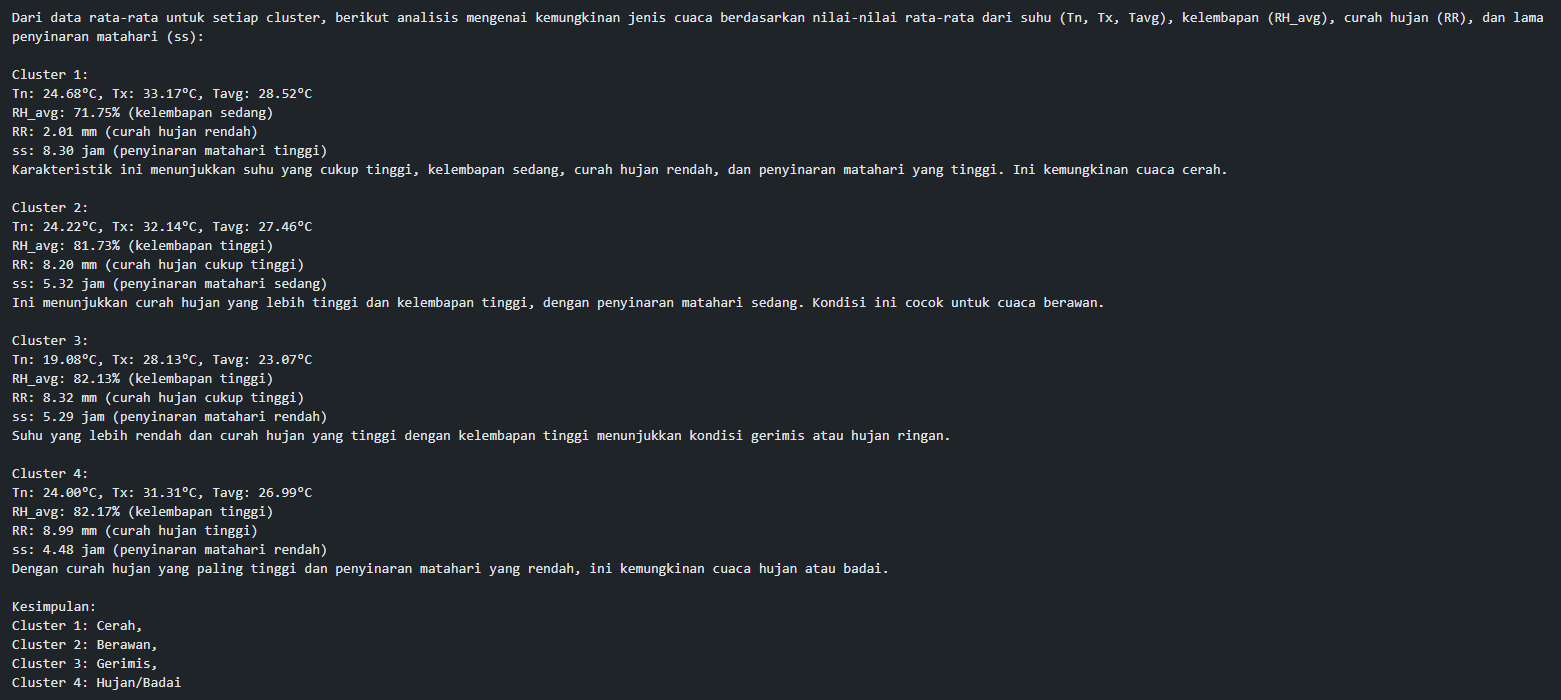

In [46]:
# Mapping jenis cuaca ke setiap cluster
cuaca_mapping = {
    1: 'Cerah',
    2: 'Berawan',
    3: 'Gerimis',
    4: 'Hujan'
}

# Menambahkan kolom 'Cuaca' berdasarkan mapping
df['Cuaca'] = df['Spectral_Cluster'].map(cuaca_mapping)

# Menampilkan beberapa baris pertama untuk memastikan penambahan kolom berhasil
df.tail(100)

,date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,station_id,Spectral_Cluster,Cuaca
29988,2020-09-10,24.4,29.6,26.8,79.0,5.73964,7.5,6.0,150.0,2.0,7.0,96987.0,4,Hujan
29989,2020-09-11,24.4,29.4,27.2,79.0,0.00000,8.7,6.0,200.0,3.0,7.0,96987.0,4,Hujan
29990,2020-09-12,24.7,29.5,27.0,73.0,0.00000,10.0,6.0,140.0,2.0,7.0,96987.0,1,Cerah
29991,2020-09-13,24.0,29.8,27.2,76.0,5.73964,7.0,4.0,210.0,2.0,0.0,96987.0,2,Berawan
29992,2020-09-14,23.8,30.3,26.9,72.0,0.00000,8.0,5.0,130.0,2.0,5.0,96987.0,1,Cerah
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30083,2020-12-27,23.4,31.3,26.8,87.0,0.00000,5.2,5.0,320.0,1.0,0.0,96987.0,2,Berawan
30084,2020-12-28,24.5,30.6,26.9,84.0,3.40000,4.0,5.0,130.0,1.0,0.0,96987.0,2,Berawan
30085,2020-12-29,24.2,30.0,26.9,88.0,5.73964,4.2,8.0,130.0,1.0,0.0,96987.0,2,Berawan
30086,2020-12-30,24.2,29.1,26.9,87.0,9.00000,6.5,3.0,220.0,0.0,0.0,96987.0,2,Berawan


Write ke new file

In [48]:
# Simpan dataframe ke file CSV
df.to_csv('new_dataset.csv', index=False)

print("File CSV telah berhasil disimpan.")

File CSV telah berhasil disimpan.
